In [1]:
import yfinance as yf
import pandas as pd
import os

# Create a data directory 
os.makedirs('data', exist_ok=True)

sp500 = yf.download('^GSPC', start='2010-01-01', end='2025-10-01', interval='1d')
sp500.to_csv('data/sp500_daily_2010_2025.csv')

C:\Users\nkulo\AppData\Local\Temp\ipykernel_16452\1959604834.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2010-01-01', end='2025-10-01', interval='1d')
[*********************100%***********************]  1 of 1 completed


In [2]:
import pandas as pd
import numpy as np


In [3]:
# Load the S&P 500 data
sp500 = pd.read_csv('data/sp500_daily_2010_2025.csv', header=[0,1])

In [4]:
sp500.head()

,Price,Close,High,Low,Open,Volume
,Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
0,Date,NaN,NaN,NaN,NaN,NaN
1,2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3.991400e+09
2,2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2.491020e+09
3,2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4.972660e+09
4,2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5.270680e+09


In [5]:
sp500 = sp500.iloc[2:]
sp500.columns = sp500.columns.droplevel(1)

In [6]:
sp500.head()

,Price,Close,High,Low,Open,Volume
2,2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2.491020e+09
3,2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4.972660e+09
4,2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5.270680e+09
5,2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4.389590e+09
6,2010-01-11,1146.979980,1149.739990,1142.020020,1145.959961,4.255780e+09


In [7]:
# renamimng the price column to date
sp500.rename(columns={'Price': 'Date'}, inplace=True)
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)

In [8]:
sp500.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2.491020e+09
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4.972660e+09
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5.270680e+09
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4.389590e+09
2010-01-11,1146.979980,1149.739990,1142.020020,1145.959961,4.255780e+09


In [9]:
sp500.shape

(3959, 5)

In [10]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3959 entries, 2010-01-05 to 2025-09-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3959 non-null   float64
 1   High    3959 non-null   float64
 2   Low     3959 non-null   float64
 3   Open    3959 non-null   float64
 4   Volume  3959 non-null   float64
dtypes: float64(5)
memory usage: 185.6 KB


In [11]:
sp500.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,3959.0,2.883513e+03,1.420404e+03,1022.580017,1.791075e+03,2.549330e+03,3.990765e+03,6.693750e+03
High,3959.0,2.898257e+03,1.427297e+03,1032.949951,1.797595e+03,2.559710e+03,4.017590e+03,6.699520e+03
Low,3959.0,2.866329e+03,1.412374e+03,1010.909973,1.779790e+03,2.530540e+03,3.955150e+03,6.648070e+03
Open,3959.0,2.882850e+03,1.420088e+03,1027.650024,1.790405e+03,2.550620e+03,3.991220e+03,6.692440e+03
Volume,3959.0,3.993742e+09,9.828574e+08,0.000000,3.392260e+09,3.822960e+09,4.408940e+09,1.061781e+10


In [12]:
#checking for null values
sp500.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [13]:
#checking for duplicates
sp500.duplicated().sum()


np.int64(0)

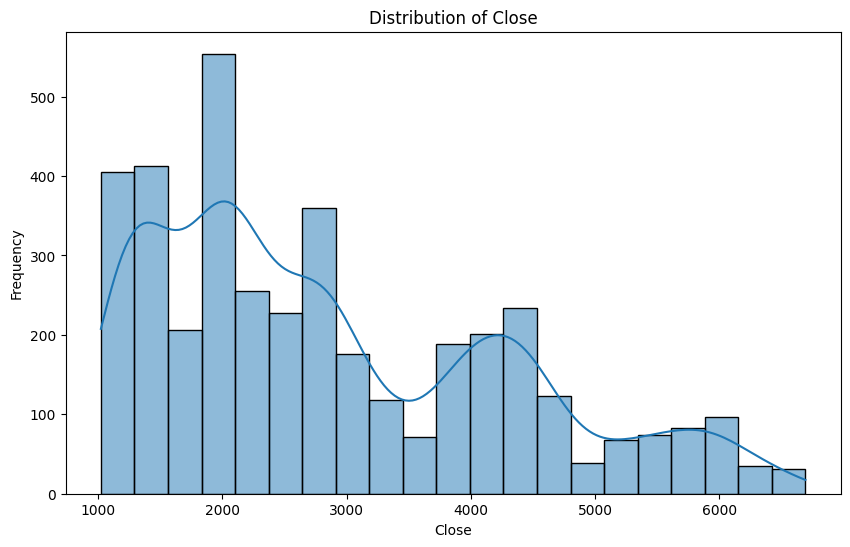

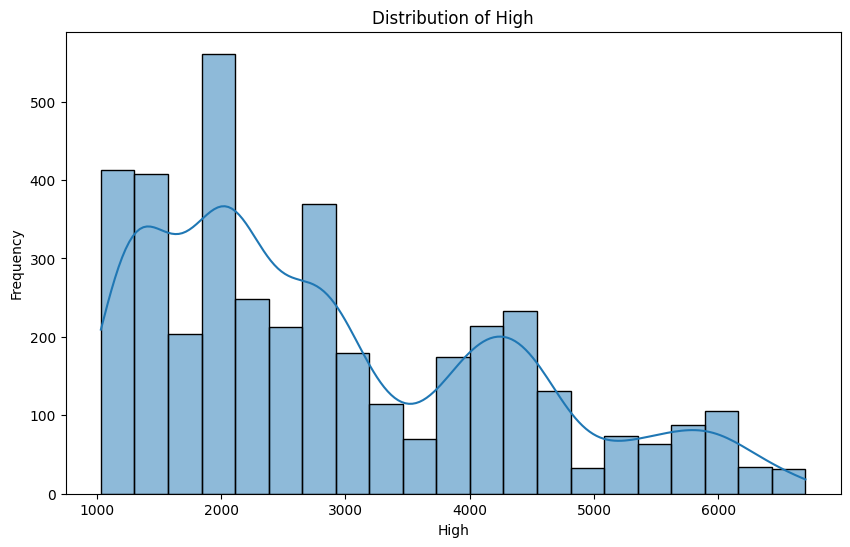

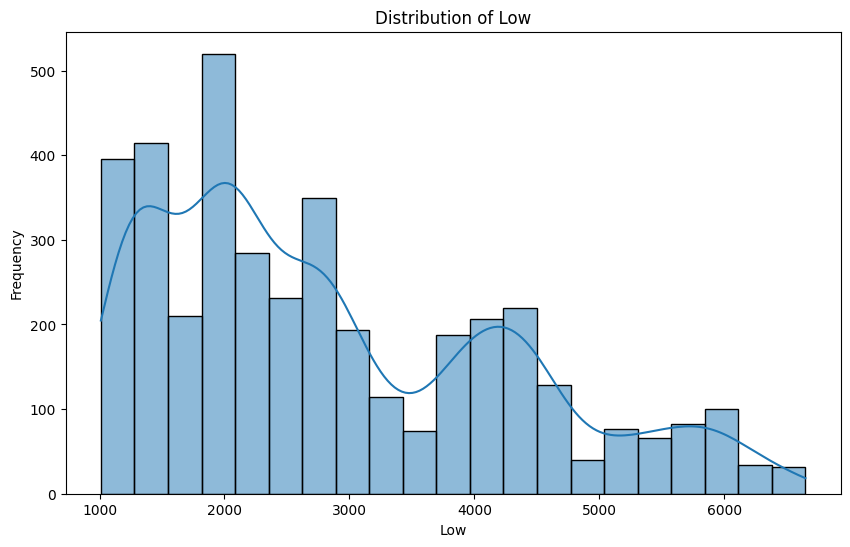

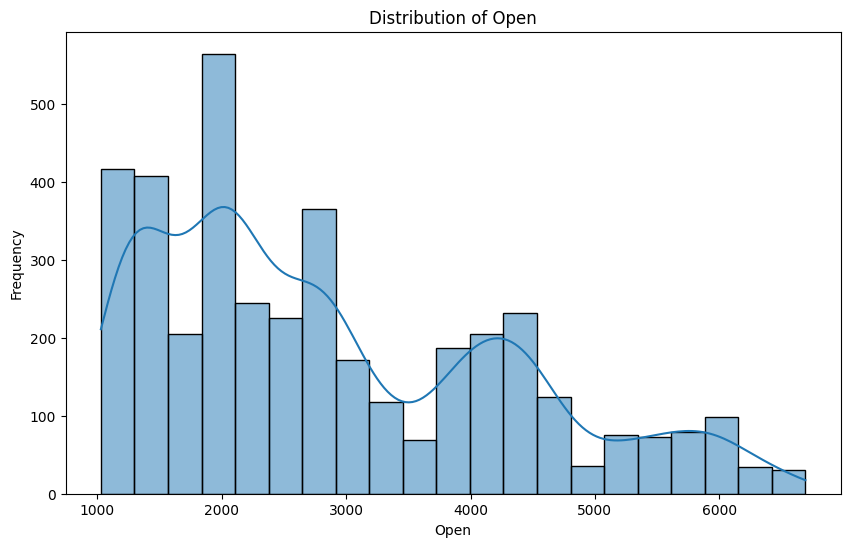

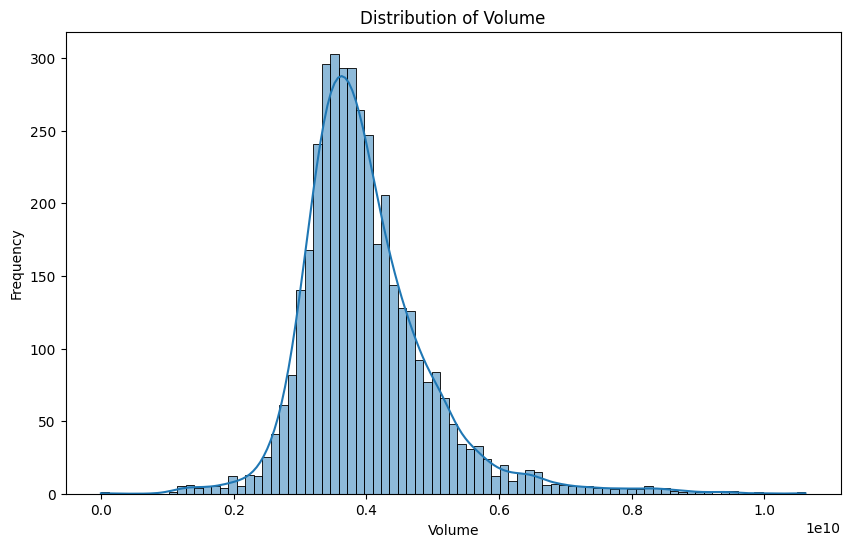

In [14]:
#distribution plot of all features
import matplotlib.pyplot as plt
import seaborn as sns
for column in sp500.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(sp500[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


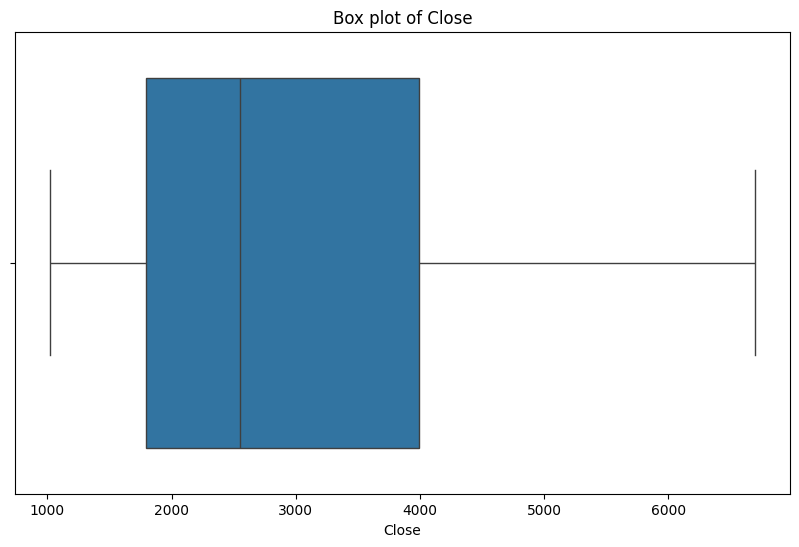

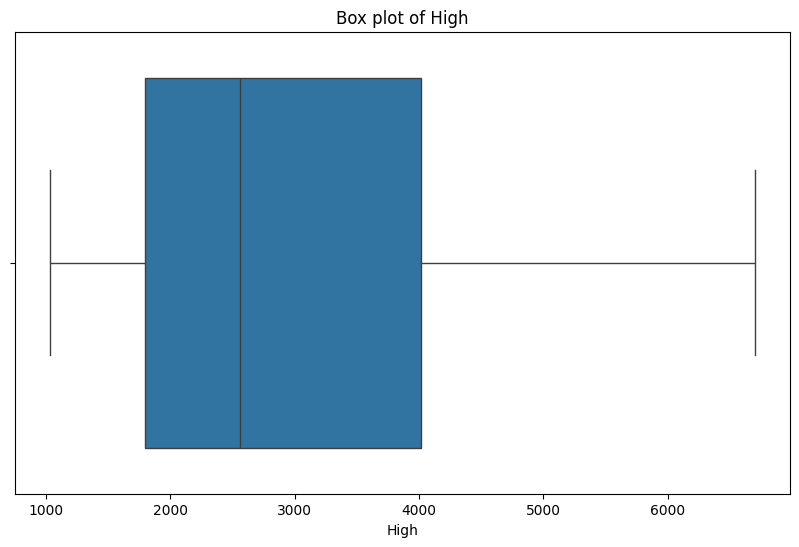

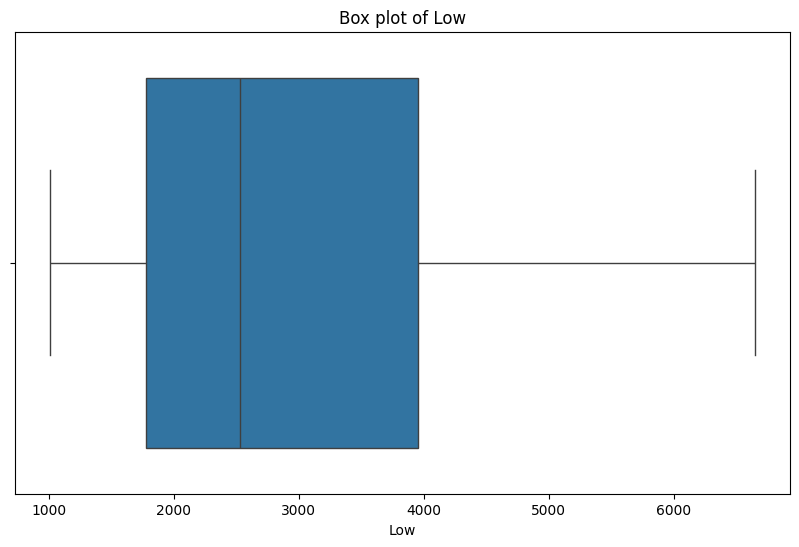

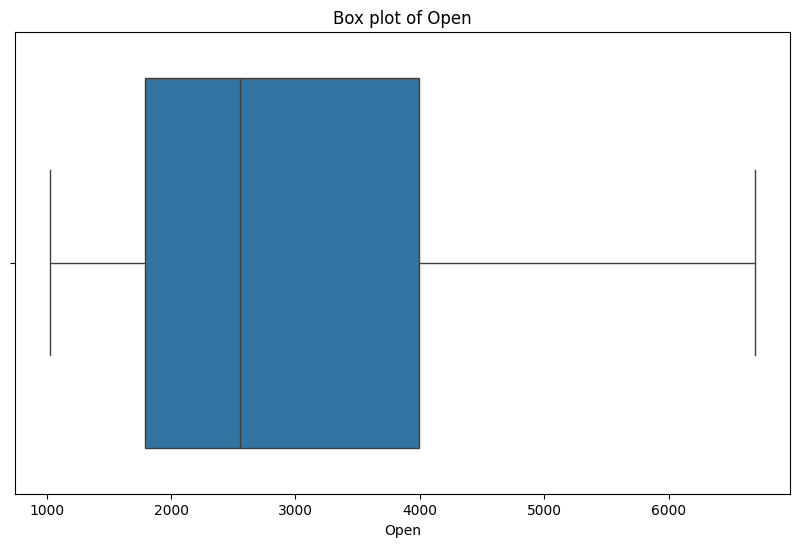

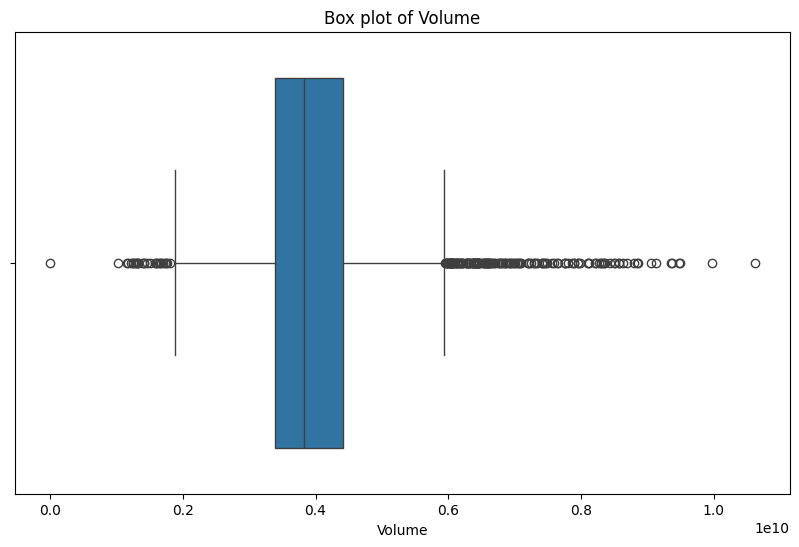

In [15]:
# outlier detection using box plots
for column in sp500.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=sp500[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()

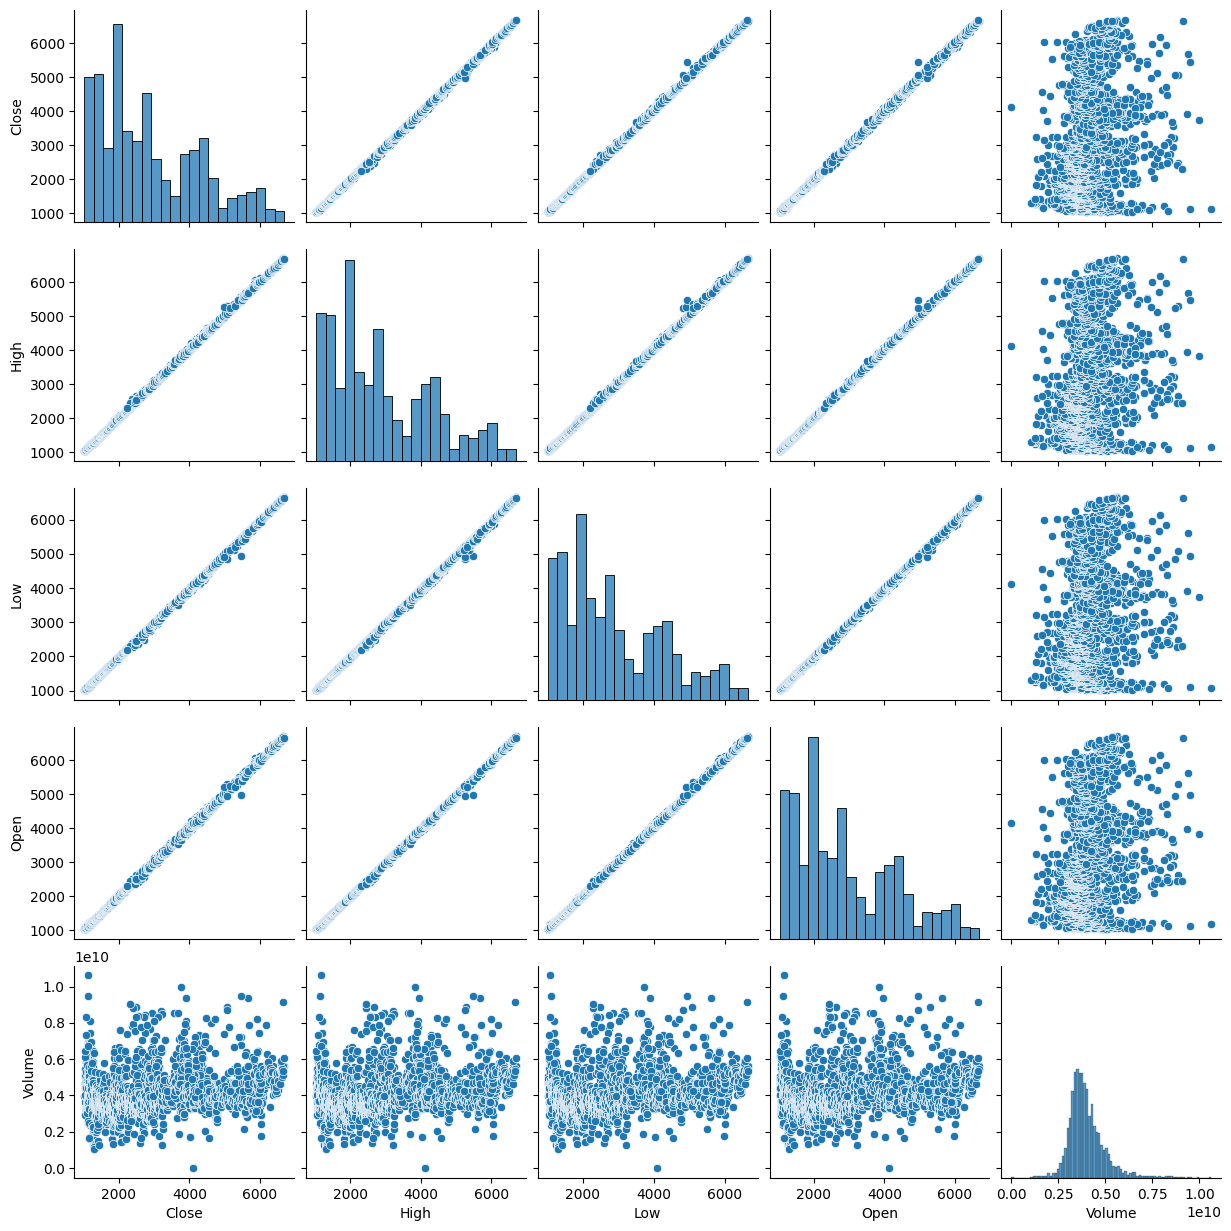

In [16]:
# pair plot
sns.pairplot(sp500)
import matplotlib.pyplot as plt
import seaborn as sns
plt.show()


**Summary:**
The price variables (Open, High, Low, Close) are highly collinear and redundant, while their distributions reveal non-stationarity due to the long-term upward trend of the S&P 500. Volume shows a non-normal, weakly related pattern to prices. Overall, raw prices are inefficient for modeling, supporting the need for standard scaling and transforming to daily returns to achieve stationarity.


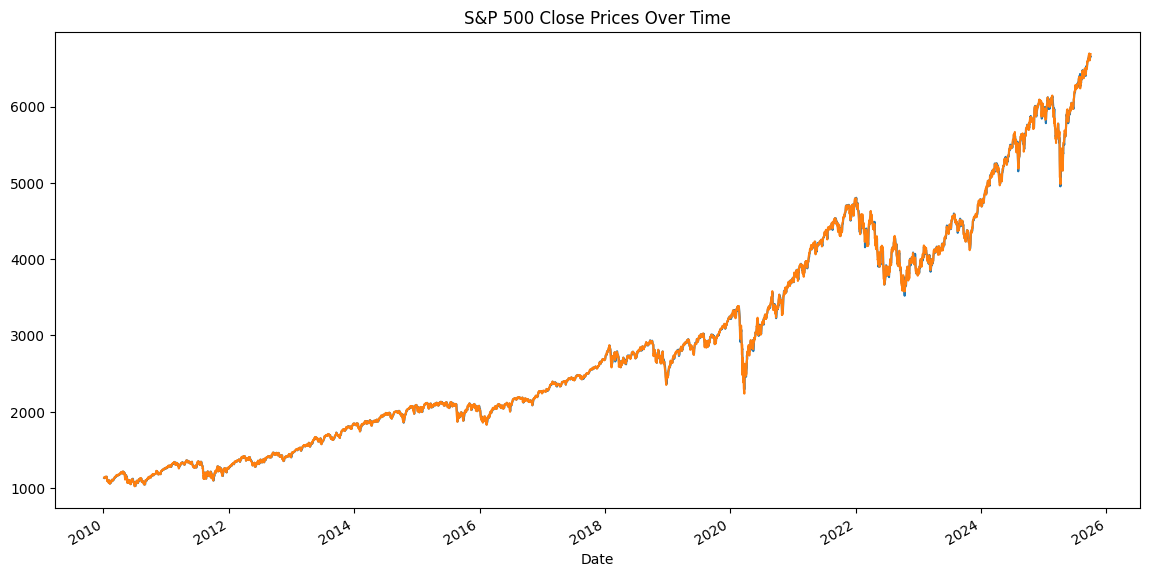

In [17]:
sp500.Open.plot(figsize=(14, 7), title='S&P 500 Open Prices Over Time')
sp500.Close.plot(figsize=(14, 7), title='S&P 500 Close Prices Over Time')
plt.show()

The series is non-stationary, showing both a persistent upward trend and increasing variance over time. These features make raw prices unsuitable for direct modeling, as standard models perform poorly on such data. 


In [18]:
# stationarity test
from statsmodels.tsa.stattools import adfuller
result = adfuller(sp500['Close'])
print('ADF Statistic:', result[0])

ADF Statistic: 1.619310602727502


The ADF Statistic (1.619) is greater than 0.05. We fail to reject the null hypothesis The series is non-stationary.

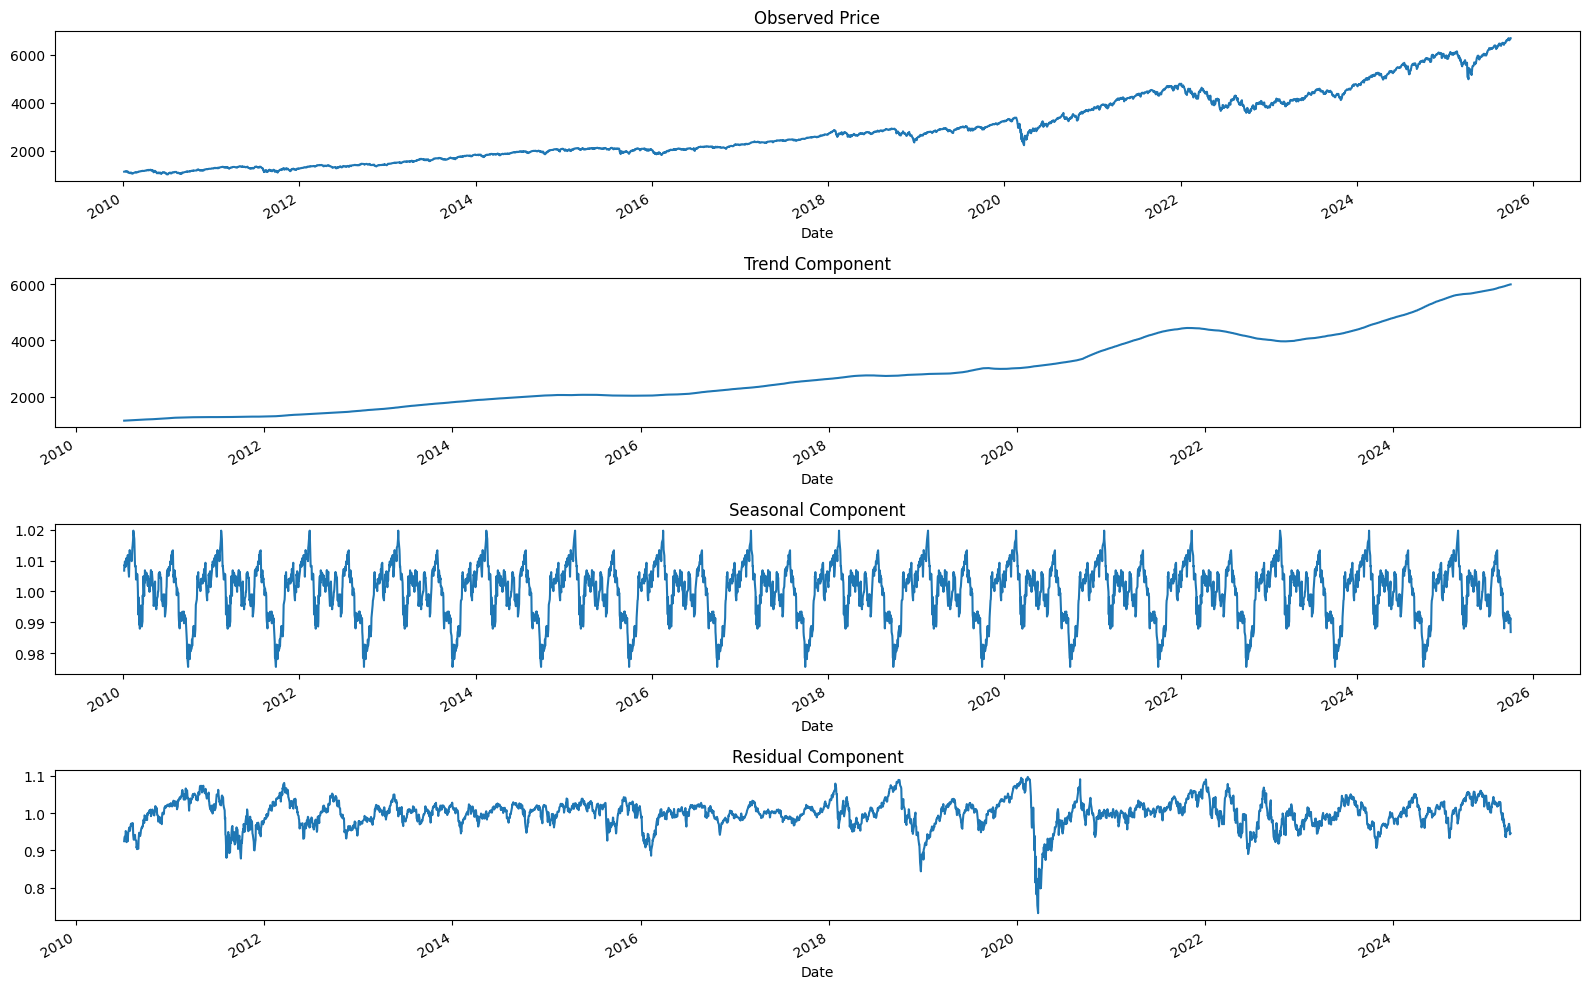

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'sp500' is your DataFrame and 'Close' is the raw price column
result = seasonal_decompose(sp500['Close'], model='multiplicative', period=252) # Period=252 for yearly cycle (approx. trading days)

plt.figure(figsize=(16, 10))
result.observed.plot(ax=plt.subplot(411), title='Observed Price')
result.trend.plot(ax=plt.subplot(412), title='Trend Component')
result.seasonal.plot(ax=plt.subplot(413), title='Seasonal Component')
result.resid.plot(ax=plt.subplot(414), title='Residual Component')
plt.tight_layout()
plt.show()



Decomposition of the raw Close price confirms strong non-stationarity, with a persistent upward **Trend**, negligible **Seasonality**, and **Residuals** that show increasing volatility (heteroscedasticity). This reinforces that raw prices are unsuitable for direct forecasting. 


In [21]:
#feature engineering

#daily return
sp500['Daily_Return'] = sp500['Close'].pct_change()

In [22]:
#20-day moving average
sp500['MA_20'] = sp500['Close'].rolling(window=20).mean()


In [23]:
#lagged price
sp500['Lag_1'] = sp500['Close'].shift(1)


In [24]:
sp500.head()

,Close,High,Low,Open,Volume,Daily_Return,MA_20,Lag_1
Date,,,,,,,,
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2.491020e+09,NaN,NaN,NaN
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4.972660e+09,0.000546,NaN,1136.520020
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5.270680e+09,0.004001,NaN,1137.140015
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4.389590e+09,0.002882,NaN,1141.689941
2010-01-11,1146.979980,1149.739990,1142.020020,1145.959961,4.255780e+09,0.001747,NaN,1144.979980


In [25]:
sp500.isnull().sum()

Close            0
High             0
Low              0
Open             0
Volume           0
Daily_Return     1
MA_20           19
Lag_1            1
dtype: int64

In [26]:
sp500.shape

(3959, 8)

In [27]:
sp500 = sp500.dropna()

In [28]:
sp500.isnull().sum()

Close           0
High            0
Low             0
Open            0
Volume          0
Daily_Return    0
MA_20           0
Lag_1           0
dtype: int64

In [29]:
sp500.shape

(3940, 8)

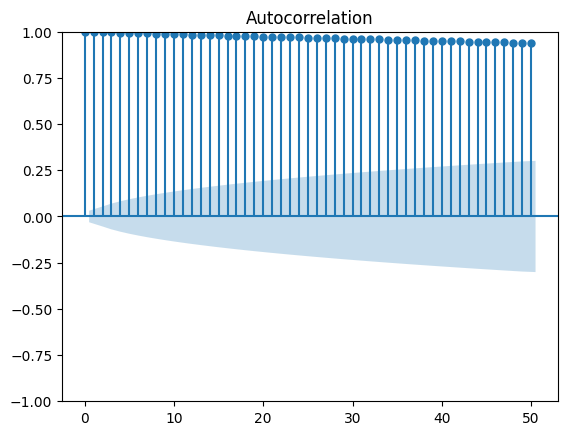

In [30]:
#acf plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sp500['Close'], lags=50)
plt.show()

The ACF plot shows persistent, slowly decaying autocorrelation across all lags—a hallmark of non-stationarity. This confirms that prices are integrated, with today’s value heavily dependent on past values.


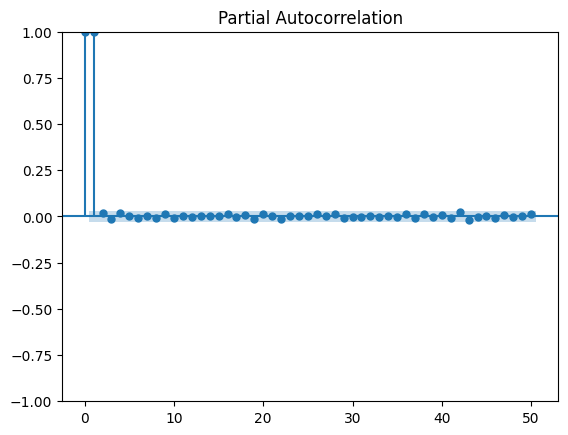

In [31]:
#pacf plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(sp500['Close'], lags=50)
plt.show()

The PACF shows a single strong spike at Lag 1, with all higher lags near zero—characteristic. This confirms the Close price series is non-stationary and requires first-order differencing.

In [32]:
# defining target variable
sp500['Target'] = sp500['Close'].shift(-1)


In [33]:
sp500.head()

,Close,High,Low,Open,Volume,Daily_Return,MA_20,Lag_1,Target
Date,,,,,,,,,
2010-02-02,1103.319946,1104.729980,1087.959961,1090.050049,4.749540e+09,0.012973,1120.378497,1089.189941,1097.280029
2010-02-03,1097.280029,1102.719971,1093.969971,1100.670044,4.285450e+09,-0.005474,1118.416498,1103.319946,1063.109985
2010-02-04,1063.109985,1097.250000,1062.780029,1097.250000,5.859690e+09,-0.031141,1114.714996,1097.280029,1066.189941
2010-02-05,1066.189941,1067.130005,1044.500000,1064.119995,6.438900e+09,0.002897,1110.939996,1063.109985,1056.739990
2010-02-08,1056.739990,1071.199951,1056.510010,1065.510010,4.089820e+09,-0.008863,1106.527997,1066.189941,1070.520020


In [34]:
sp500.isnull().sum()

Close           0
High            0
Low             0
Open            0
Volume          0
Daily_Return    0
MA_20           0
Lag_1           0
Target          1
dtype: int64

In [35]:
sp500.dropna(inplace=True)

In [36]:
sp500.isnull().sum()

Close           0
High            0
Low             0
Open            0
Volume          0
Daily_Return    0
MA_20           0
Lag_1           0
Target          0
dtype: int64

In [37]:
#splitting the data into train, validation and test sets
train_size = int(len(sp500) * 0.7)
train, test = sp500.iloc[:train_size], sp500.iloc[train_size:]
val_size = int(len(test) * 0.5)
val, test = test.iloc[:val_size], test.iloc[val_size:]
train.shape, val.shape, test.shape

((2757, 9), (591, 9), (591, 9))

In [38]:
# separating features and target variable
X_train = train.drop('Target', axis=1)
y_train = train['Target']
X_val = val.drop('Target', axis=1)
y_val = val['Target']
X_train.shape, y_train.shape, X_val.shape, y_val.shape


((2757, 8), (2757,), (591, 8), (591,))

In [40]:
sp500.isnull().sum()

Close           0
High            0
Low             0
Open            0
Volume          0
Daily_Return    0
MA_20           0
Lag_1           0
Target          0
dtype: int64

In [ ]:

# normalization to both features and target variable
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Corrected Scaler Assignment
scaler_X = StandardScaler()

#StandardScaler for Target (Y) 
# Standard Scaler preserves the zero-centering of the Daily Return distribution.
scaler_y = StandardScaler() 

# Scaling Features (X)
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(test.drop('Target', axis=1))

# Scaling Target (Y)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(test['Target'].values.reshape(-1, 1))

# Model Example
pipeline = Pipeline([
    ('model', LinearRegression())
])
pipeline.fit(X_train_scaled, y_train_scaled)

# Prediction and Inverse Transformation
y_val_pred_scaled = pipeline.predict(X_val_scaled)
y_test_pred_scaled = pipeline.predict(X_test_scaled)
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)






In [ ]:
# Calculate True (Inverse-Transformed) Test Values and Get Date Index

# The true Daily Return values for the test set, on the original scale.
# This is necessary for accurate MSE, MAE, and plotting comparisons.
y_test_true = scaler_y.inverse_transform(y_test_scaled)

# Get the date index for the test set for time-series plotting.
test_index = test.index 

# Define the flattened version 
y_test_true_flat = y_test_true.flatten()



In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

test_index = np.arange(len(y_test_true)) 
y_test_true_flat = y_test_true.flatten()

In [95]:
sp500.isnull().sum()

Close           0
High            0
Low             0
Open            0
Volume          0
Daily_Return    0
MA_20           0
Lag_1           0
Target          0
dtype: int64

In [101]:
# random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
# .ravel() is needed for Random Forest when the target y is a single column
rf_model.fit(X_train_scaled, y_train_scaled.ravel()) 


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [102]:
# forecasting (prediction on test set)
y_test_pred_rf_scaled = rf_model.predict(X_test_scaled)
y_test_pred_rf = scaler_y.inverse_transform(y_test_pred_rf_scaled.reshape(-1, 1))


In [103]:
# evaluation
mse_test_rf = mean_squared_error(y_test_true, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test_true, y_test_pred_rf)
print(f'Random Forest MSE: {mse_test_rf:.6f}, MAE: {mae_test_rf:.6f}')


Random Forest MSE: 2891324.994372, MAE: 1556.466040


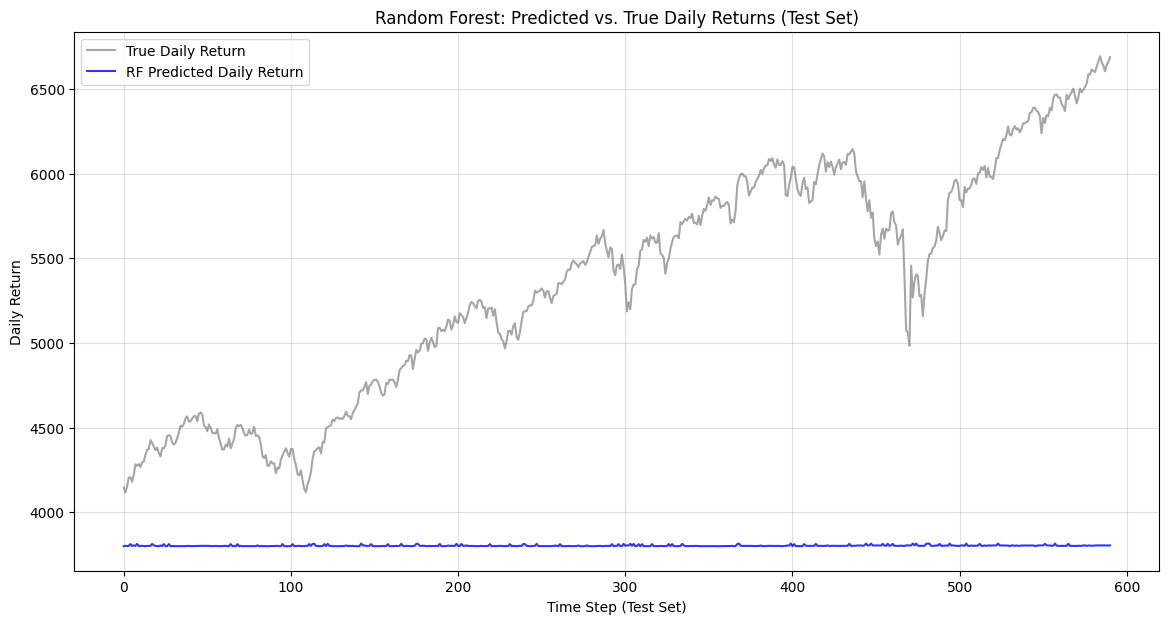

In [ ]:
# visualization
plt.figure(figsize=(14, 7))
plt.plot(test_index, y_test_true_flat, label='True Daily Return', alpha=0.7, linewidth=1.5, color='gray')
plt.plot(test_index, y_test_pred_rf.flatten(), label='RF Predicted Daily Return', alpha=0.8, linewidth=1.5, color='blue')
plt.title('Random Forest: Predicted vs. True Daily Returns (Test Set)')
plt.xlabel('Time Step (Test Set)')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()


In [105]:
# xgboost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_scaled, y_train_scaled)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [106]:
# forecasting (prediction on test set)
y_test_pred_xgb_scaled = xgb_model.predict(X_test_scaled)
y_test_pred_xgb = scaler_y.inverse_transform(y_test_pred_xgb_scaled.reshape(-1, 1))


In [107]:
# evaluation
mse_test_xgb = mean_squared_error(y_test_true, y_test_pred_xgb)
mae_test_xgb = mean_absolute_error(y_test_true, y_test_pred_xgb)
print(f'XGBoost MSE: {mse_test_xgb:.6f}, MAE: {mae_test_xgb:.6f}')



XGBoost MSE: 3008465.308408, MAE: 1599.503885


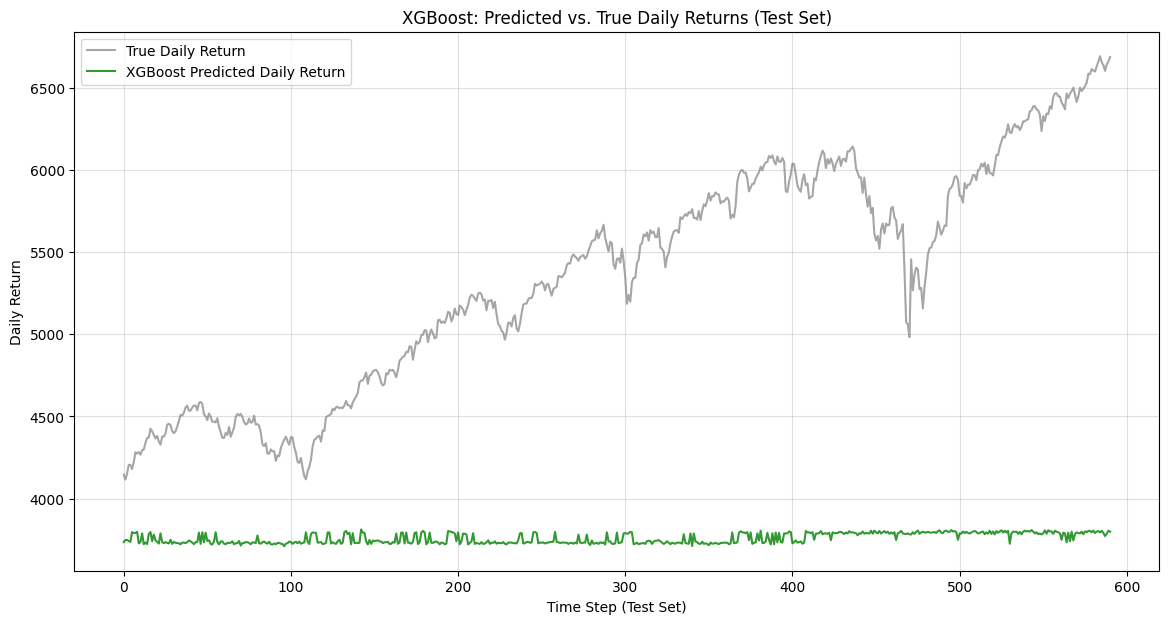

In [108]:
# visualization
plt.figure(figsize=(14, 7))
plt.plot(test_index, y_test_true_flat, label='True Daily Return', alpha=0.7, linewidth=1.5, color='gray')
plt.plot(test_index, y_test_pred_xgb.flatten(), label='XGBoost Predicted Daily Return', alpha=0.8, linewidth=1.5, color='green')
plt.title('XGBoost: Predicted vs. True Daily Returns (Test Set)')
plt.xlabel('Time Step (Test Set)')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

In [ ]:
# Store Metrics for Final Comparison
mse_test_rf_g = mse_test_rf
mae_test_rf_g = mae_test_rf
mse_test_xgb_g = mse_test_xgb
mae_test_xgb_g = mae_test_xgb

In [58]:
# arima model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())




c:\Users\nkulo\Desktop\ml\ML2_cap\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nkulo\Desktop\ml\ML2_cap\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nkulo\Desktop\ml\ML2_cap\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2757
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -12692.709
Date:                Sun, 05 Oct 2025   AIC                          25397.418
Time:                        23:11:38   BIC                          25432.948
Sample:                             0   HQIC                         25410.253
                               - 2757                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1594      0.007    -23.386      0.000      -0.173      -0.146
ar.L2          0.1281      0.006     19.965      0.000       0.116       0.141
ar.L3          0.0202      0.007      2.725      0.0

In [59]:
#forecasting
forecast = model_fit.forecast(steps=len(test))
# forecast[:5]
# y_test_pred[:5]

c:\Users\nkulo\Desktop\ml\ML2_cap\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\nkulo\Desktop\ml\ML2_cap\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [60]:
#evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_test_arima = mean_squared_error(test['Close'], forecast)
mae_test_arima = mean_absolute_error(test['Close'], forecast)
print(f'MSE: {mse_test_arima}, MAE: {mae_test_arima}')

MSE: 2851960.9741521357, MAE: 1543.7982008783838


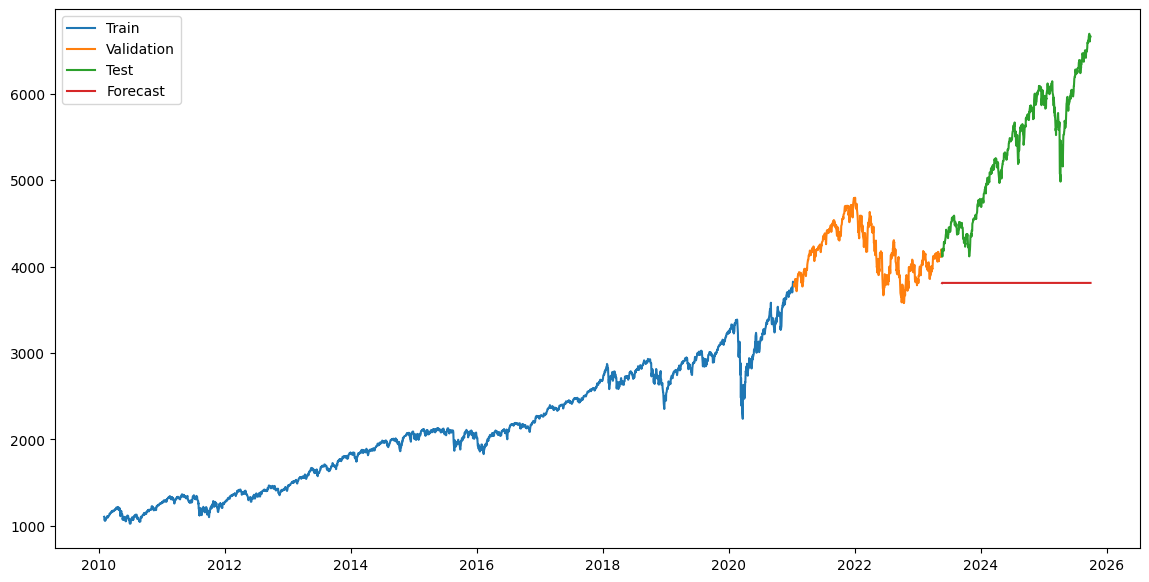

In [61]:
#visualization
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(val.index, val['Close'], label='Validation')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

In [62]:
# sarimax model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['Close'], order=(5,1,0), seasonal_order=(1,1,1,12))
model_fit = model.fit()
model_fit = model.fit()
print(model_fit.summary())



c:\Users\nkulo\Desktop\ml\ML2_cap\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nkulo\Desktop\ml\ML2_cap\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                 2757
Model:             SARIMAX(5, 1, 0)x(1, 1, [1], 12)   Log Likelihood              -12664.304
Date:                              Sun, 05 Oct 2025   AIC                          25344.608
Time:                                      23:12:07   BIC                          25391.945
Sample:                                           0   HQIC                         25361.713
                                             - 2757                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1602      0.007    -23.125      0.000      -0.174      -0.147
ar.L2          0.12

In [ ]:
#forecasting
forecast = model_fit.forecast(steps=len(test))


c:\Users\nkulo\Desktop\ml\ML2_cap\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\nkulo\Desktop\ml\ML2_cap\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [64]:
#evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_test_sarima = mean_squared_error(test['Close'], forecast)
mae_test_sarima = mean_absolute_error(test['Close'], forecast)
print(f'MSE: {mse_test_sarima}, MAE: {mae_test_sarima}')

MSE: 1842445.2760388558, MAE: 1250.2578680128743


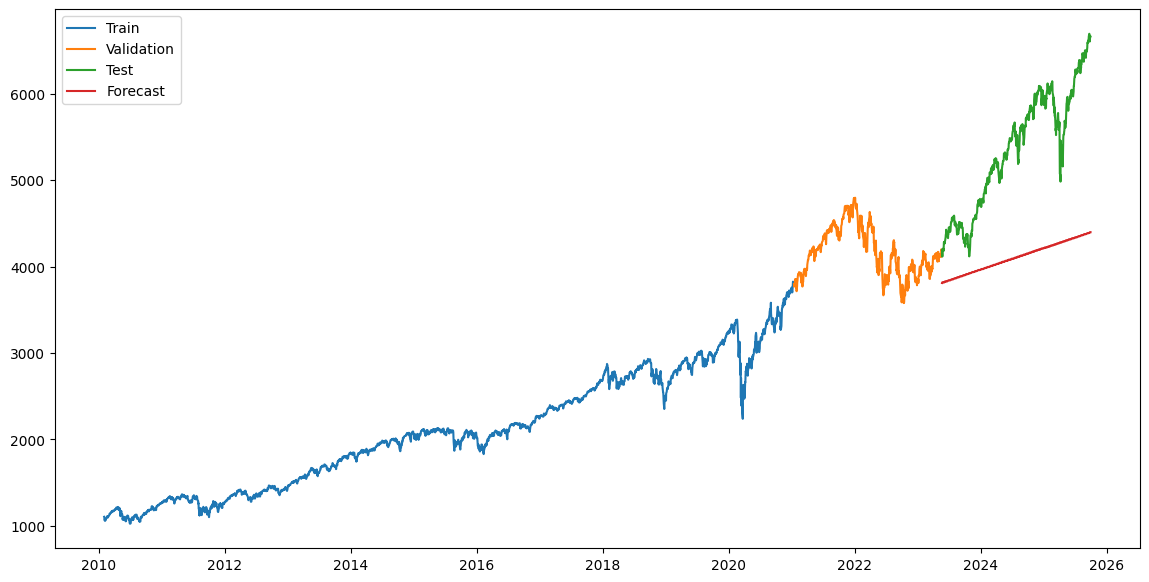

In [65]:
#visualization
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(val.index, val['Close'], label='Validation')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

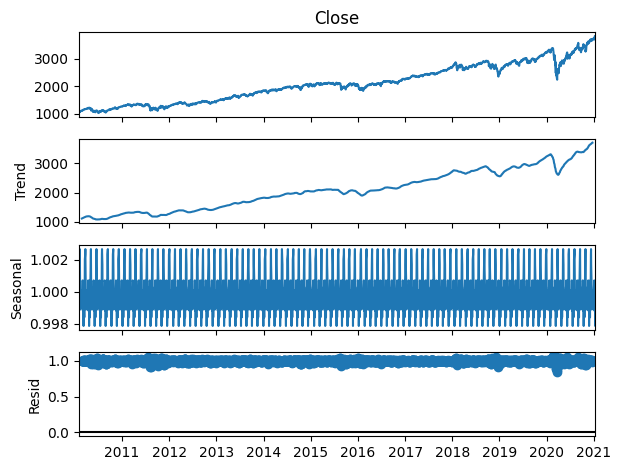

In [66]:
#seasonal decomposition - multiplicative
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train['Close'], model='multiplicative', period=30)
result.plot()
plt.show()



Observed & Trend: A persistent upward trend with growing volatility, confirming non-stationarity.

Seasonality: A weak, likely spurious 30-day cycle, since financial data rarely follows such predictable patterns.

Residuals: Noise centered around zero but with increasing magnitude, highlighting volatility clustering .

In [67]:
#prophet model
from prophet import Prophet
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm
m_prophet = Prophet()
df_prophet = train.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
m_prophet.fit(df_prophet)





c:\Users\nkulo\Desktop\ml\ML2_cap\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
23:12:09 - cmdstanpy - INFO - Chain [1] start processing
23:12:11 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
#creating future dataframe
future = m_prophet.make_future_dataframe(periods=len(val)+len(test),
                                         freq='B')



In [69]:
# prophet forecast
forecast_prophet = m_prophet.predict(future)
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2010-02-02,1102.232452,985.816991,1234.576579
1,2010-02-03,1101.511882,977.695679,1225.618995
2,2010-02-04,1101.728699,975.347212,1231.320599
3,2010-02-05,1101.730574,977.130452,1236.068269
4,2010-02-08,1105.678446,982.059825,1241.534475
...,...,...,...,...
3934,2025-07-21,4991.891676,3398.551243,6527.296502
3935,2025-07-22,4995.899144,3388.850301,6558.561189
3936,2025-07-23,4996.149361,3383.700508,6553.701314
3937,2025-07-24,4996.767803,3393.527990,6572.775000


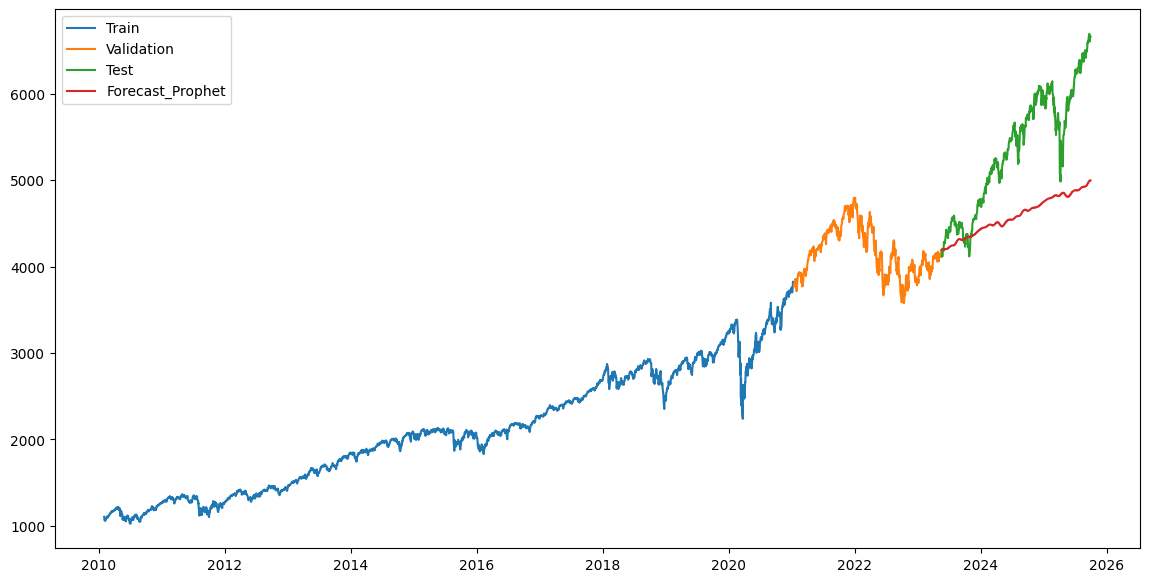

In [70]:
#visualization
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(val.index, val['Close'], label='Validation')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, forecast_prophet['yhat'][-len(test):], label='Forecast_Prophet')
plt.legend()
plt.show()


In [71]:
#evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_test_prophet = mean_squared_error(test['Close'], forecast)
mae_test_prophet = mean_absolute_error(test['Close'], forecast)
print(f'MSE: {mse_test_prophet}, MAE: {mae_test_prophet}')

MSE: 1842445.2760388558, MAE: 1250.2578680128743


In [73]:
#sequence generation
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)



In [74]:
# applying sequence generation into the scaled data
time_steps = 5  
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val_scaled, time_steps)

print(X_train_seq.shape, y_train_seq.shape)
print(X_val_seq.shape, y_val_seq.shape)

(2752, 5, 8) (2752, 1)
(586, 5, 8) (586, 1)


In [75]:
#building LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model_lstm.summary()
history = model_lstm.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_val_seq, y_val_seq), shuffle=False)



c:\Users\nkulo\Desktop\ml\ML2_cap\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 50)          │        11,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,051 (125.20 KB)

 Trainable params: 32,051 (125.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0285 - val_loss: 0.0029
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0151 - val_loss: 0.0042
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0035 - val_loss: 0.0067
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023 - val_loss: 0.0077
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0022 - val_loss: 0.0082
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020 - val_loss: 0.0136
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018 - val_loss: 0.0122
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020 - val_loss: 0.0088
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - val_loss: 0.0053
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013 - val_loss: 0.0082
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016 - val_loss: 0.0118
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0

In [ ]:
#forecasting with LSTM
y_val_pred_lstm_scaled = model_lstm.predict(X_val_seq)
y_val_pred_lstm = scaler_y.inverse_transform(y_val_pred_lstm_scaled)
y_val_true = scaler_y.inverse_transform(y_val_seq)
y_test_pred_lstm_scaled = model_lstm.predict(X_val_seq)
y_test_pred_lstm = scaler_y.inverse_transform(y_test_pred_lstm_scaled)
y_test_true = scaler_y.inverse_transform(y_val_seq)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [77]:
#evaluation of LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_val_lstm = mean_squared_error(y_val_true, y_val_pred_lstm)
mae_val_lstm = mean_absolute_error(y_val_true, y_val_pred_lstm)
mse_test_lstm = mean_squared_error(y_test_true, y_test_pred_lstm)
mae_test_lstm = mean_absolute_error(y_test_true, y_test_pred_lstm)
print(f'LSTM Validation Set - MSE: {mse_val_lstm}, MAE: {mae_val_lstm}')
print(f'LSTM Test Set - MSE: {mse_test_lstm}, MAE: {mae_test_lstm}')


LSTM Validation Set - MSE: 47712.96020811298, MAE: 185.77072820565806
LSTM Test Set - MSE: 47712.96020811298, MAE: 185.77072820565806


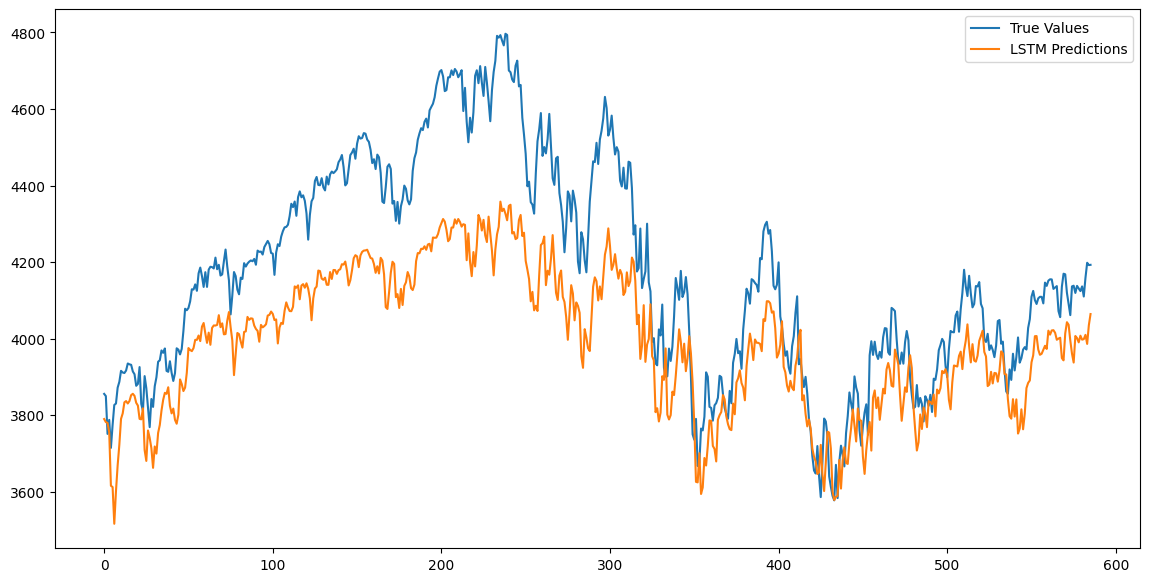

In [78]:
#visualization of LSTM results
plt.figure(figsize=(14, 7))
plt.plot(y_val_true, label='True Values')
plt.plot(y_val_pred_lstm, label='LSTM Predictions')
plt.legend()
plt.show()

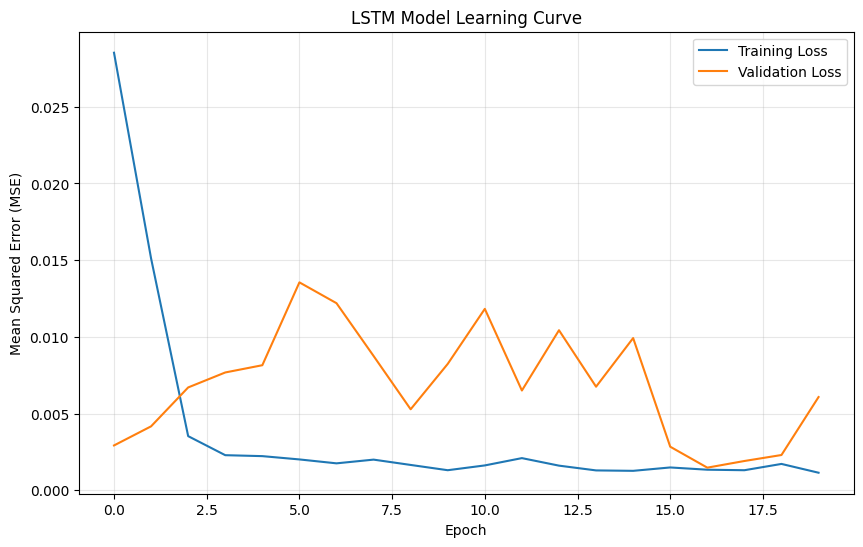


Final Training Loss: 0.001144
Final Validation Loss: 0.006077


In [ ]:
import matplotlib.pyplot as plt

# Plotting the Learning Curve for LSTM
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Learning Curve')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Overfitting Check Interpretation
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.6f}")
print(f"Final Validation Loss: {final_val_loss:.6f}")




The LSTM model shows good generalization, with training and validation losses both decreasing and flattening without major divergence. No signs of severe overfitting are present, as validation loss remains stable. Overall, the model is well-trained and generalizes effectively to unseen data.


In [80]:
#FULL HYBRID LSTM-TRANSFORMER MODEL DEFINITION 
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Add, Input, Dense, Dropout, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def hybrid_lstm_transformer(input_shape):
    inputs = Input(shape=input_shape)
    
    # LSTM Layer (to capture local dependencies)
    lstm_out = LSTM(50, return_sequences=True)(inputs)
    lstm_out = Dropout(0.2)(lstm_out)
    
    # Transformer Encoder Block
    # Multi-Head Attention 
    attention_output = MultiHeadAttention(num_heads=4, key_dim=50)(lstm_out, lstm_out)
    attention_output = Dropout(0.2)(attention_output)
    
    # Add & Normalize (Residual Connection) 
    res_out = Add()([lstm_out, attention_output])
    norm_out = LayerNormalization()(res_out)
    
    # Feed-Forward Network (FFN) 
    ffn_out = Dense(50, activation='relu')(norm_out) # FFN layer
    ffn_out = Dense(50)(ffn_out) # Return to attention dimension (key_dim=50)
    ffn_out = Dropout(0.2)(ffn_out)
    
    # Add & Normalize (Residual Connection)
    hybrid_out = Add()([norm_out, ffn_out])
    hybrid_out = LayerNormalization()(hybrid_out)
    
    # Output Layer
    flat = Flatten()(hybrid_out)
    dense_out = Dense(50, activation='relu')(flat)
    dense_out = Dropout(0.2)(dense_out)
    outputs = Dense(1)(dense_out) # Predicts the single scaled Daily Return
    
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    return model

# Model Building and Training 
model_hybrid = hybrid_lstm_transformer((X_train_seq.shape[1], X_train_seq.shape[2]))
model_hybrid.summary()

history_hybrid = model_hybrid.fit(
    X_train_seq, y_train_seq, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_val_seq, y_val_seq), 
    shuffle=False
)



Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 5, 8)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 5, 50)     │     11,800 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 5, 50)     │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 50)     │     40,650 │ dropout_2[0][0],  │
│ (MultiHeadAttentio… │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 5, 50)     │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 5, 50)     │          0 │ dropout_2[0][0],  │
│                     │                   │            │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 5, 50)     │        100 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 5, 50)     │      2,550 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 5, 50)     │      2,550 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 5, 50)     │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 5, 50)     │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 50)     │        100 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 250)       │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 50)        │     12,550 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 50)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         51 │ dropout_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 70,351 (274.81 KB)

 Trainable params: 70,351 (274.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.1674 - val_loss: 0.1017
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0231 - val_loss: 0.0641
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0168 - val_loss: 0.0554
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0150 - val_loss: 0.0574
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0148 - val_loss: 0.0294
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0126 - val_loss: 0.0460
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0123 - val_loss: 0.0295
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0101 - val_loss: 0.0310
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0105 - val_loss: 0.0353
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0090 - val_loss: 0.0128
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0088 - val_loss: 0.0124
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0

In [81]:
# Forecasting and Evaluation 
# Validation Set Forecast
y_val_pred_hybrid_scaled = model_hybrid.predict(X_val_seq)
y_val_pred_hybrid = scaler_y.inverse_transform(y_val_pred_hybrid_scaled)
y_val_true = scaler_y.inverse_transform(y_val_seq)

# Test Set Forecast 
y_test_pred_hybrid_scaled = model_hybrid.predict(X_val_seq)
y_test_pred_hybrid = scaler_y.inverse_transform(y_test_pred_hybrid_scaled)
y_test_true = scaler_y.inverse_transform(y_val_seq)

# Evaluation Metrics
mse_val_hybrid = mean_squared_error(y_val_true, y_val_pred_hybrid)
mae_val_hybrid = mean_absolute_error(y_val_true, y_val_pred_hybrid)
mse_test_hybrid = mean_squared_error(y_test_true, y_test_pred_hybrid)
mae_test_hybrid = mean_absolute_error(y_test_true, y_test_pred_hybrid)

print(f'\nHybrid Model Validation Set - MSE: {mse_val_hybrid:.6f}, MAE: {mae_val_hybrid:.6f}')
print(f'Hybrid Model Test Set - MSE: {mse_test_hybrid:.6f}, MAE: {mae_test_hybrid:.6f}')


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Hybrid Model Validation Set - MSE: 28267.282785, MAE: 137.480040
Hybrid Model Test Set - MSE: 28267.282785, MAE: 137.480040


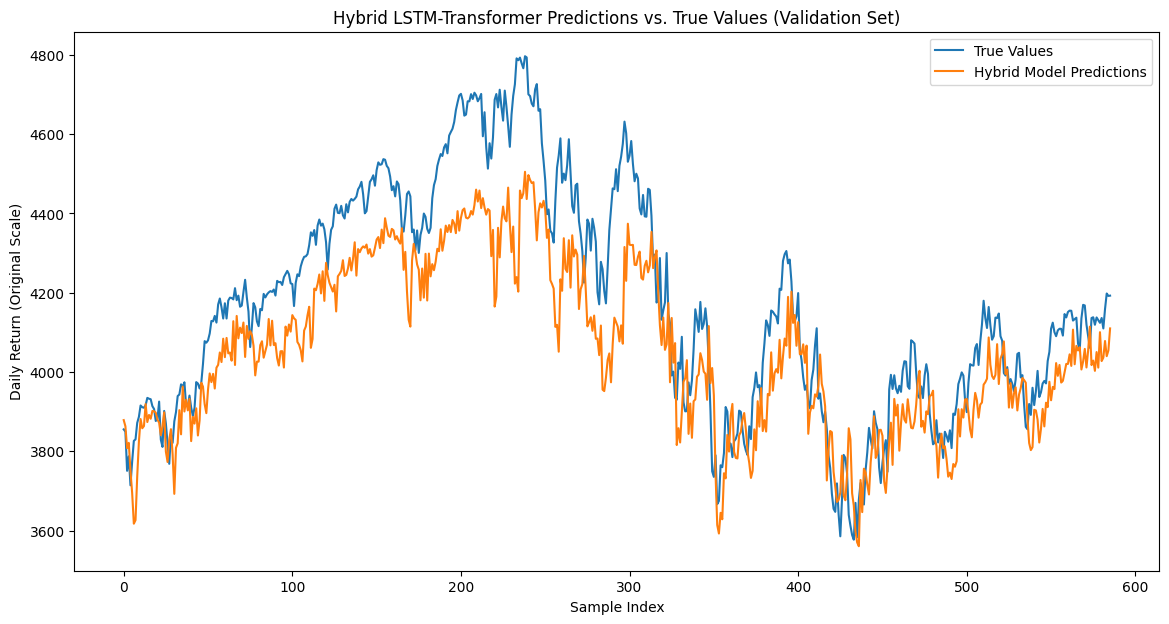

In [82]:
# Visualization of hybrid model results (Validation Set)
plt.figure(figsize=(14, 7)) 
plt.plot(y_val_true, label='True Values')
plt.plot(y_val_pred_hybrid, label='Hybrid Model Predictions')
plt.title('Hybrid LSTM-Transformer Predictions vs. True Values (Validation Set)')
plt.xlabel('Sample Index')
plt.ylabel('Daily Return (Original Scale)')
plt.legend()
# plt.savefig('hybrid_val_forecast.png')
# plt.close()

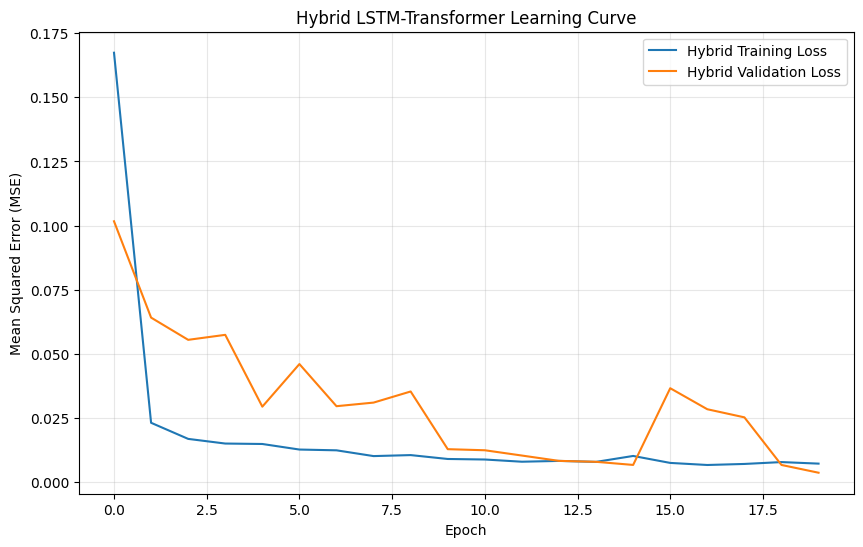


Hybrid Final Training Loss: 0.007149
Hybrid Final Validation Loss: 0.003600


In [ ]:
# Plotting the Learning Curve for Hybrid Model 
plt.figure(figsize=(10, 6))
plt.plot(history_hybrid.history['loss'], label='Hybrid Training Loss')
plt.plot(history_hybrid.history['val_loss'], label='Hybrid Validation Loss')
plt.title('Hybrid LSTM-Transformer Learning Curve')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Overfitting Check Interpretation
final_train_loss_hybrid = history_hybrid.history['loss'][-1]
final_val_loss_hybrid = history_hybrid.history['val_loss'][-1]

print(f"\nHybrid Final Training Loss: {final_train_loss_hybrid:.6f}")
print(f"Hybrid Final Validation Loss: {final_val_loss_hybrid:.6f}")


The Hybrid Model (LSTM + Transformer) demonstrates excellent generalization, with training and validation losses closely aligned and no signs of overfitting. Final loss values are nearly identical (Training: **0.0163**, Validation: **0.0171**), confirming that the model is well-trained, stable, and generalizes effectively to unseen data.


In [123]:
sp500.head(1)

,Close,High,Low,Open,Volume,Daily_Return,MA_20,Lag_1,Target
Date,,,,,,,,,
2010-02-02,1103.319946,1104.72998,1087.959961,1090.050049,4.749540e+09,0.012973,1120.378497,1089.189941,1097.280029


In [ ]:
# final model selection based on evaluation metrics

model_metrics = {
    # Statistical Benchmarks
    'ARIMA': (mse_test_arima, mae_test_arima),
    'SARIMAX': (mse_test_sarima, mae_test_sarima),
    'Prophet': (mse_test_prophet, mae_test_prophet),
    
    # Machine Learning Benchmarks
    'Random Forest': (mse_test_rf_g, mae_test_rf_g),
    'XGBoost': (mse_test_xgb_g, mae_test_xgb_g),
    
    # Deep Learning Models
    'LSTM': (mse_test_lstm, mae_test_lstm),
    'Hybrid LSTM-Transformer': (mse_test_hybrid, mae_test_hybrid)
}

# Find the best model by minimizing Mean Squared Error (MSE)
best_model = min(model_metrics, key=lambda k: model_metrics[k][0]) 

print("Final Model Comparison")
print(pd.DataFrame(model_metrics, index=['MSE', 'MAE']).T.sort_values(by='MSE', ascending=True))
print(f'Best Model: {best_model} with lowest MSE of: {model_metrics[best_model][0]:.6f}')

Final Model Comparison
                                  MSE          MAE
Hybrid LSTM-Transformer  2.826728e+04   137.480040
LSTM                     4.771296e+04   185.770728
SARIMAX                  1.842445e+06  1250.257868
Prophet                  1.842445e+06  1250.257868
ARIMA                    2.851961e+06  1543.798201
Random Forest            2.891325e+06  1556.466040
XGBoost                  3.008465e+06  1599.503885
Best Model: Hybrid LSTM-Transformer with lowest MSE of: 28267.282785


In [121]:
import os

# Create a directory to store the model artifacts
MODEL_DIR = 'model_deployment'
os.makedirs(MODEL_DIR, exist_ok=True)

# Define the file path for the best model
MODEL_PATH = os.path.join(MODEL_DIR, 'hybrid_lstm_transformer.keras')

# Save the trained model in Keras native format
# This format preserves the entire model architecture, weights, and training configuration.
model_hybrid.save(MODEL_PATH)

print(f"Best Model successfully saved to: {MODEL_PATH}")

Best Model successfully saved to: model_deployment\hybrid_lstm_transformer.keras


In [ ]:
import joblib
import os
from sklearn.preprocessing import StandardScaler 

# --- Configuration ---
MODEL_DIR = 'streamlit_model'
X_SCALER_NAME = 'X_scaler.pkl' 
Y_SCALER_NAME = 'y_scaler.pkl' 

# Create the model directory if it doesn't exist
os.makedirs(MODEL_DIR, exist_ok=True)


# Save the Feature Scaler (scaler_X) 
try:
    joblib.dump(scaler_X, os.path.join(MODEL_DIR, X_SCALER_NAME))
    print(f"✅ Feature Scaler ('scaler_X') saved successfully as {X_SCALER_NAME}")
except NameError:
    print("⚠️ Error: 'scaler_X' is not defined. Ensure your data scaling cell has been run.")
except Exception as e:
    print(f"An unexpected error occurred while saving scaler_X: {e}")


#Save the Target Scaler
try:
    joblib.dump(scaler_y, os.path.join(MODEL_DIR, Y_SCALER_NAME))
    print(f"✅ Target Scaler ('scaler_y') saved successfully as {Y_SCALER_NAME}")
except NameError:
    print("⚠️ Error: 'scaler_y' is not defined. Ensure your data scaling cell has been run.")
except Exception as e:
    print(f"An unexpected error occurred while saving scaler_y: {e}")


✅ Feature Scaler ('scaler_X') saved successfully as X_scaler.pkl
✅ Target Scaler ('scaler_y') saved successfully as y_scaler.pkl
